In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving decisiontree_1 (1).csv to decisiontree_1 (1).csv


In [3]:
data = pd.read_csv('decisiontree_1 (1).csv')

encoding = {
    "mesin": {"bensin": 0, "diesel": 1},
    "penggerak": {"depan": 0, "belakang": 1}
}

data.replace(encoding, inplace=True)
data.head()

/tmp/ipython-input-3398562086.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(encoding, inplace=True)


,ID,mesin,bangku,penggerak,label
0,1,0,4,0,sedan
1,2,0,2,0,sedan
2,3,0,8,1,minibus
3,4,1,6,0,minibus
4,5,0,5,1,minibus


In [4]:
data.head()

,ID,mesin,bangku,penggerak,label
0,1,0,4,0,sedan
1,2,0,2,0,sedan
2,3,0,8,1,minibus
3,4,1,6,0,minibus
4,5,0,5,1,minibus


In [6]:
x = data.drop(['ID', 'label'], axis =1)
y = data['label']

In [7]:
import sklearn.model_selection as ms

x_train, x_test, y_train, y_test = ms.train_test_split(x,
                                                       y,
                                                       test_size=0.5, random_state=42)

In [8]:
import sklearn.tree as tree
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
y_prediksi = model.predict(x_test)
y_prediksi

array(['minibus', 'sedan', 'minibus', 'sedan', 'minibus', 'sedan',
       'minibus', 'sedan', 'minibus', 'sedan', 'minibus', 'minibus',
       'minibus', 'sedan', 'minibus', 'sedan', 'sedan'], dtype=object)

In [10]:
import sklearn.metrics as met
print (met.accuracy_score(y_test, y_prediksi))

0.9411764705882353


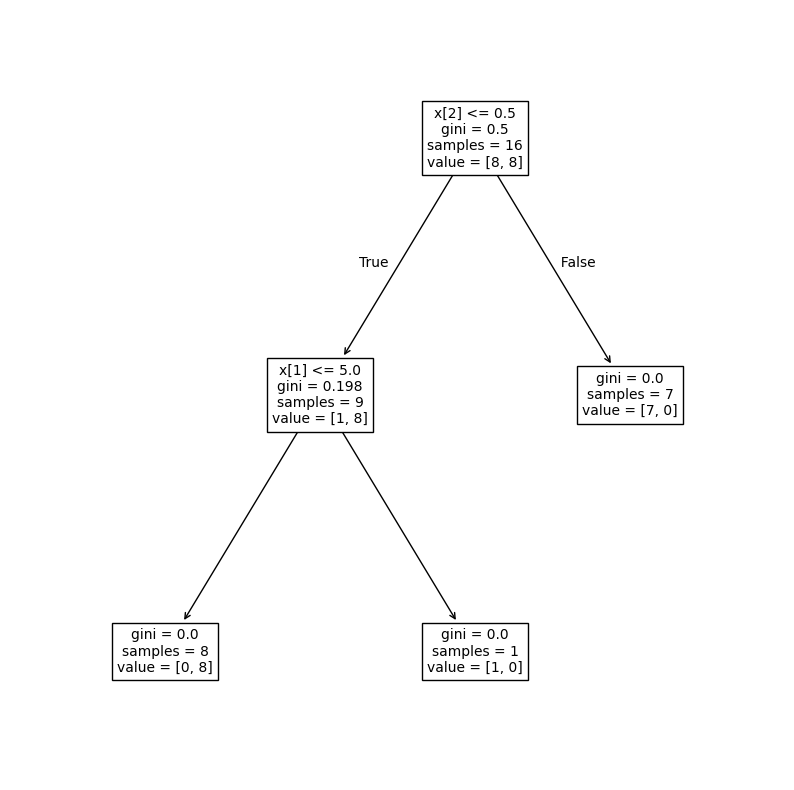

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize=(10,10))
tree.plot_tree(model, fontsize=10)
plt.show()